## LIBRERÍAS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install CountryInfo
!pip install ipympl

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [19]:
# plt.style.available
plt.style.use("seaborn-v0_8")

## CARGANDO DATOS

In [6]:
dataset_ig = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BOOTCAMP_DSW/SESION_03/DATA_SESION_03/instagram.csv", sep = "\u0001")
dataset_ig.head()

,instagram_name,category_1,category_2,followers,audience_country_mostly,authentic_engagement,engagement_avg,cant_categorias
0,433,Sports with a ball,NaN,48500000.0,Spain,3831000,6370000.0,1
1,TAEYANG,Music,NaN,12700000.0,Indonesia,4780000,5423000.0,1
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18800000.0,Russia,3108000,3779000.0,1
3,Joy,Lifestyle,NaN,13500000.0,Indonesia,1100000,1400000.0,1
4,Jaehyun,NaN,NaN,11100000.0,Indonesia,2500000,3100000.0,0


In [7]:
dataset_tk= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BOOTCAMP_DSW/SESION_03/DATA_SESION_03/tiktok.csv", sep = "\u0001")
dataset_tk.head()

,tiktoker_name,tiktok_name,subscribers_count,views_avg,likes_avg,comments_avg,shares_avg
0,ekin.721,MOMO’s,2217000.0,26000000.0,2800000,294000,1164000
1,dojacat,Doja Cat,22200000.0,25400000.0,5000000,367000,468000
2,kiet.ac.quy,Kiệt Ắk Wỷ,2100000.0,20700000.0,3500000,388000,339000
3,charlidamelio,charli d’amelio,135400000.0,18700000.0,2600000,547000,352000
4,luvadepedreiro,Iran Ferreira (Lai),11400000.0,24800000.0,2600000,327000,268000


In [8]:
dataset_yt= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BOOTCAMP_DSW/SESION_03/DATA_SESION_03/youtube.csv", sep = "\u0001")
dataset_yt.head()

,youtuber_name,channel_name,category,subscribers,audience_country,avg_views,avg_likes,avg_comments
0,tseries,T-Series,Music & Dance,212100000.0,India,3237000.0,98000,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000.0,NaN,13800000.0,809000,0
2,setindia,SET India,NaN,130400000.0,India,236000.0,314,21
3,PewDiePie,PewDiePie,Animation,111400000.0,United States,1400000.0,808000,46000
4,MrBeast6000,MrBeast,Video games,92500000.0,United States,30600000.0,1700000,677000


## ANÁLISIS GRÁFICO

### Instagram

In [40]:
dfCountIg = (
    dataset_ig
    .groupby(["instagram_name"])
    .agg(followers = ("followers", "sum"))
    .reset_index()
    .sort_values(["followers"], ascending = False)
)

dfCountIg.head()

,instagram_name,followers
304,Instagram,487200000.0
371,Justin Bieber,454400000.0
163,Cristiano Ronaldo,419600000.0
419,Kylie 🤍,323300000.0
438,Leo Messi,315400000.0


<ipython-input-41-e81045591276>:20: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  plt.tight_layout()
<ipython-input-41-e81045591276>:20: UserWarning: Glyph 769 (\N{COMBINING ACUTE ACCENT}) missing from current font.
  plt.tight_layout()
<ipython-input-41-e81045591276>:20: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  plt.tight_layout()
<ipython-input-41-e81045591276>:20: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  plt.tight_layout()
<ipython-input-41-e81045591276>:20: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from current font.
  plt.tight_layout()
<ipython-input-41-e81045591276>:20: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_fi

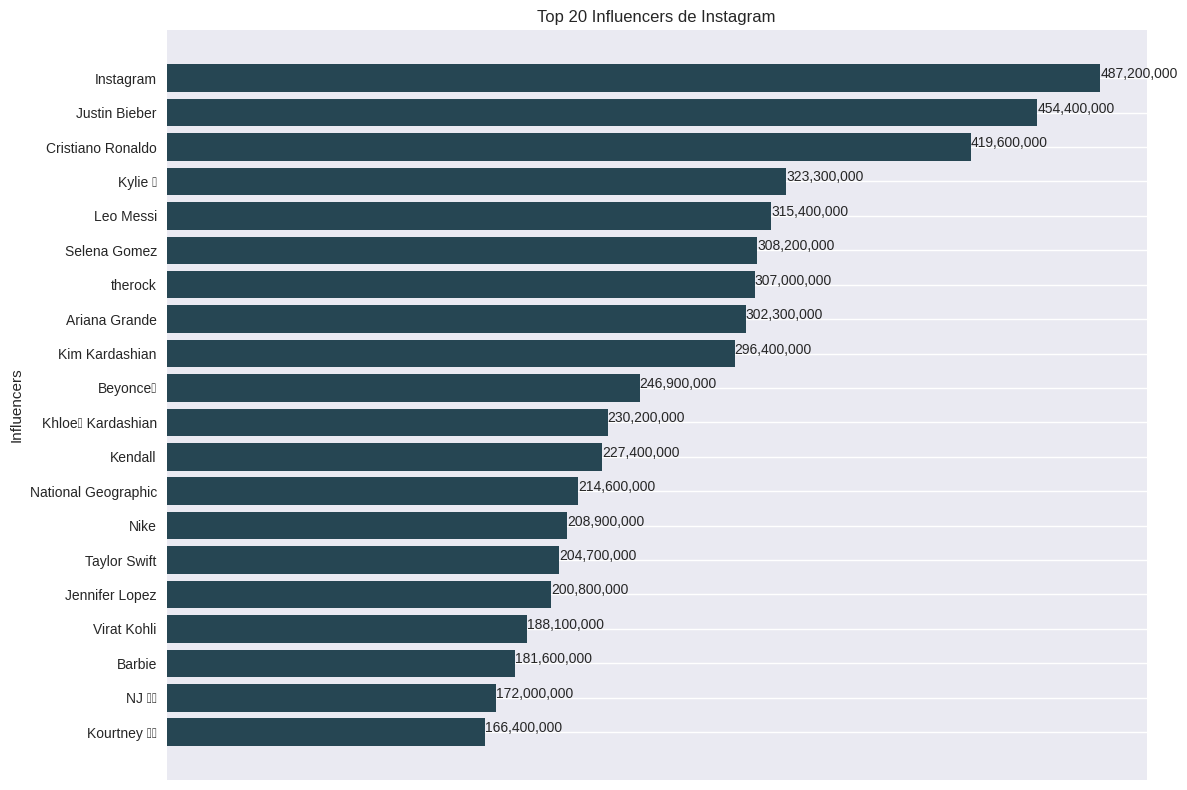

In [41]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(
    dfCountIg.head(20)["instagram_name"],
    dfCountIg.head(20)["followers"],
    color = "#264653"
)

ax.invert_yaxis()

ax.set_title("Top 20 Influencers de Instagram")
ax.set_xlabel("Cantidad de Seguidores")
ax.set_ylabel("Influencers")

for i, etiqueta in enumerate(dfCountIg.head(20)["followers"]):
  ax.annotate(text = format(int(etiqueta), ","), xy = (etiqueta, i))

ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()

### TikTok

In [42]:
dfCountTk = (
    dataset_tk
    .groupby(["tiktok_name"])
    .agg(subscribers_count = ("subscribers_count", "sum"))
    .reset_index()
    .sort_values(["subscribers_count"], ascending = False)
)
dfCountTk.head()

,tiktok_name,subscribers_count
719,charli d’amelio,135400000.0
346,Khabane lame,135200000.0
69,Bella Poarch,88500000.0
14,Addison Rae,87300000.0
540,ROD🥴,80200000.0


<ipython-input-43-a6ff3ec5c935>:20: UserWarning: Glyph 129396 (\N{FACE WITH UNEVEN EYES AND WAVY MOUTH}) missing from current font.
  plt.tight_layout()
<ipython-input-43-a6ff3ec5c935>:20: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
<ipython-input-43-a6ff3ec5c935>:20: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-43-a6ff3ec5c935>:20: UserWarning: Glyph 47592 (\N{HANGUL SYLLABLE MAEN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129396 (\N{FACE WITH UNEVEN EYES AND WAVY MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

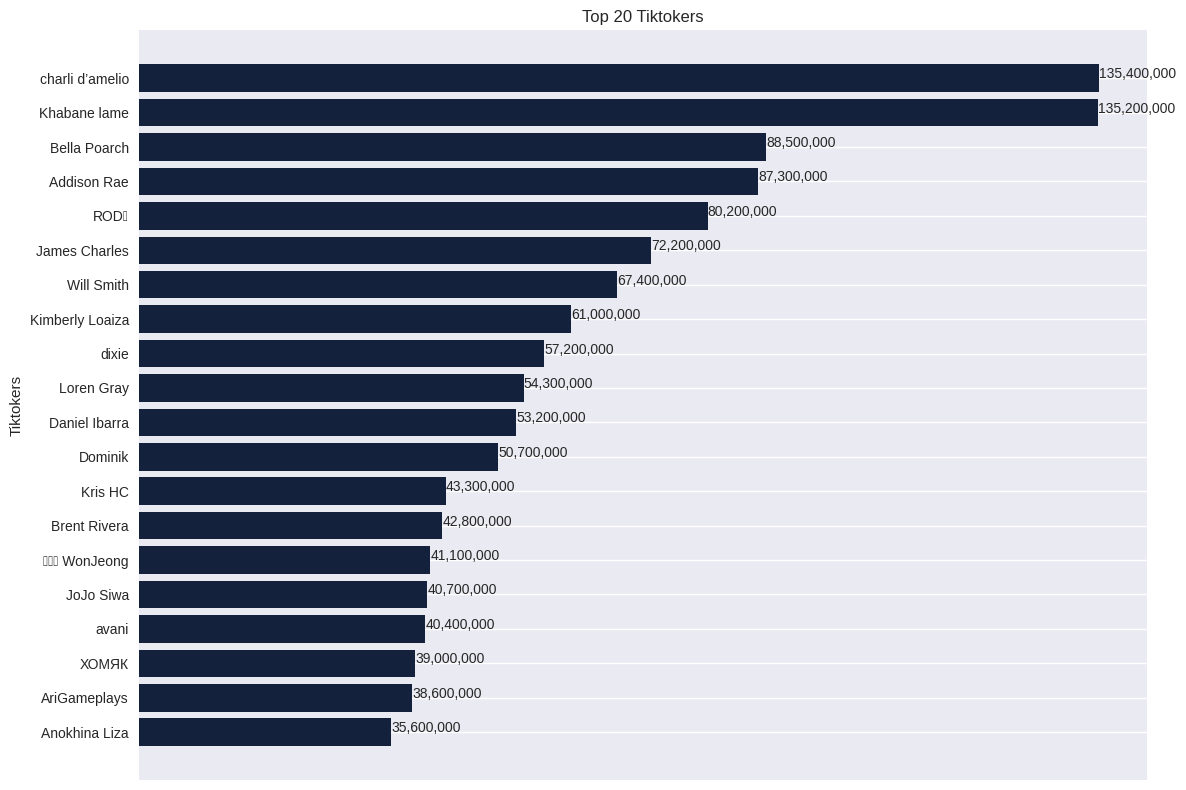

In [43]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(
    dfCountTk.head(20)["tiktok_name"],
    dfCountTk.head(20)["subscribers_count"],
    color = "#14213d"
)

ax.invert_yaxis()

ax.set_title("Top 20 Tiktokers")
ax.set_xlabel("Cantidad de Suscriptores")
ax.set_ylabel("Tiktokers")

for i, etiqueta in enumerate(dfCountTk.head(20)["subscribers_count"]):
  ax.annotate(text = format(int(etiqueta), ","), xy = (etiqueta, i))

ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()

### YouTube

In [44]:
dfCountYt = (
    dataset_yt
    .groupby(["channel_name"])
    .agg(subscribers = ("subscribers", "sum"))
    .reset_index()
    .sort_values(["subscribers"], ascending = False)
)
dfCountYt.head()

,channel_name,subscribers
741,T-Series,212100000.0
147,Cocomelon - Nursery Rhymes,132100000.0
673,SET India,130400000.0
614,PewDiePie,111400000.0
541,MrBeast,92500000.0


<ipython-input-45-6cd9630e5b16>:20: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


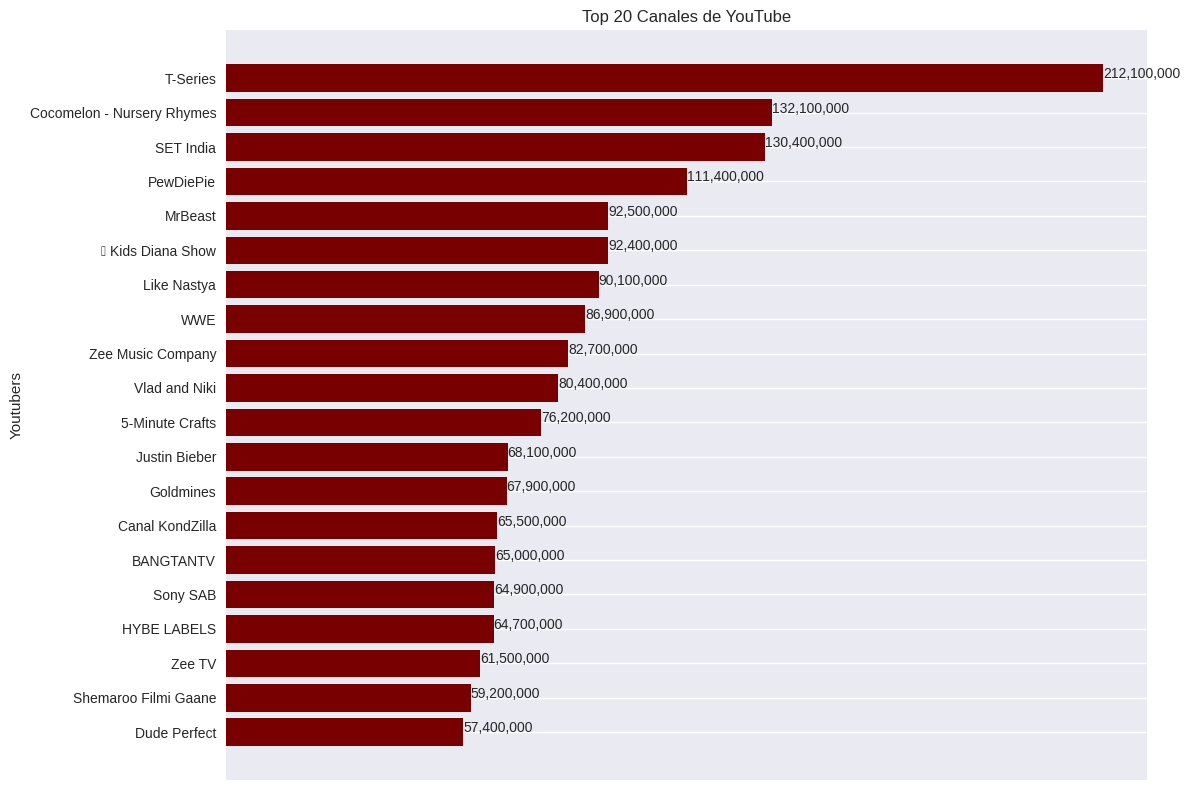

In [45]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.barh(
    dfCountYt.head(20)["channel_name"],
    dfCountYt.head(20)["subscribers"],
    color = "#780000"
)

ax.invert_yaxis()

ax.set_title("Top 20 Canales de YouTube")
ax.set_xlabel("Cantidad de Suscriptores")
ax.set_ylabel("Youtubers")

for i, etiqueta in enumerate(dfCountYt.head(20)["subscribers"]):
  ax.annotate(text = format(int(etiqueta), ","), xy = (etiqueta, i))

ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()

In [46]:
dfCountIg["social_media"] = "Instagram"
dfCountTk["social_media"] = "TikTok"
dfCountYt["social_media"] = "YouTube"

## renombrando columnas

dfCountIg.rename(columns = {"followers" : "people"}, inplace = True)
dfCountTk.rename(columns = {"subscribers_count" : "people"}, inplace = True)
dfCountYt.rename(columns = {"subscribers" : "people"}, inplace = True)

dfCountSocialMedia = pd.concat([dfCountIg[["social_media", "people"]],
                                dfCountTk[["social_media", "people"]],
                                dfCountYt[["social_media", "people"]]])
dfCountSocialMedia

,social_media,people
304,Instagram,487200000.0
371,Instagram,454400000.0
163,Instagram,419600000.0
419,Instagram,323300000.0
438,Instagram,315400000.0
...,...,...
826,YouTube,9200000.0
805,YouTube,9200000.0
142,YouTube,9200000.0
720,YouTube,9200000.0


In [51]:
dicSocialMediaCount = (
    dfCountSocialMedia
    .query("people <= 100000000")
    .groupby(["social_media"])["people"]
    .apply(lambda x : list(x))
    .to_dict()
)
print(dicSocialMediaCount)

{'Instagram': [91400000.0, 81600000.0, 79000000.0, 77000000.0, 75700000.0, 75700000.0, 75300000.0, 73900000.0, 73200000.0, 71900000.0, 71900000.0, 71800000.0, 70500000.0, 68900000.0, 68500000.0, 67400000.0, 66500000.0, 65800000.0, 65500000.0, 65099999.99999999, 64800000.0, 64200000.0, 62900000.0, 62700000.0, 62400000.0, 61800000.0, 61700000.0, 61600000.0, 61100000.0, 61100000.0, 60900000.0, 60600000.0, 59300000.0, 58600000.0, 58300000.0, 58000000.0, 57900000.0, 57500000.0, 57500000.0, 56500000.0, 55400000.0, 54000000.0, 53000000.0, 52900000.0, 52900000.0, 52800000.0, 52800000.0, 52100000.0, 52100000.0, 51900000.0, 51900000.0, 51900000.0, 51500000.0, 50800000.0, 50700000.0, 50600000.0, 49700000.0, 49700000.0, 49600000.0, 49100000.0, 49100000.0, 49000000.0, 48500000.0, 48200000.0, 47900000.0, 47700000.0, 47700000.0, 47700000.0, 47400000.0, 47300000.0, 46600000.0, 46600000.0, 46400000.0, 46400000.0, 46300000.0, 46200000.0, 45800000.0, 45800000.0, 45400000.0, 45000000.0, 44900000.0, 449000

In [114]:
from google.colab import output
#output.disable_custom_widget_manager()
output.disable_custom_widget_manager()

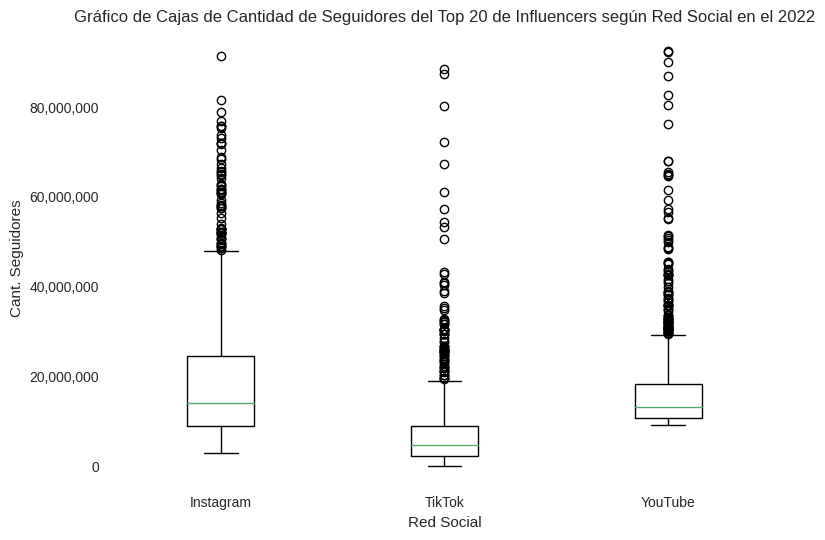

In [61]:
fig, ax = plt.subplots()

ax.boxplot(
    dicSocialMediaCount.values(),
    labels = dicSocialMediaCount.keys()
)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p : format(int(x), ",")))

ax.set_title("Gráfico de Cajas de Cantidad de Seguidores del Top 20 de Influencers según Red Social en el 2022")
ax.set_xlabel("Red Social")
ax.set_ylabel("Cant. Seguidores")

ax.grid(True)
ax.set_facecolor("white")

plt.tight_layout()
plt.show()

In [55]:
from countryinfo import CountryInfo

# Lista de países
paises = [
    'Spain', 'Indonesia', 'Russia', 'Brazil', 'Poland', 'South Korea',
    'United States', 'Thailand', 'India', 'Iraq', 'Morocco', 'Turkey',
    'Mexico', 'Chile', 'Iran', 'Italy', 'Colombia', 'Argentina',
    'Philippines', 'United Kingdom', 'Germany', 'Nigeria', 'Serbia',
    'Albania', 'United Arab Emirates', 'China', 'France', 'Japan',
    'Egypt', 'Syria', 'Algeria', 'Ukraine'
]

# Crear un diccionario de países y continentes
diccionario_paises_continentes = {}

for pais in paises:
    country_info = CountryInfo(pais)
    continente = country_info.region()
    diccionario_paises_continentes[pais] = continente

print(diccionario_paises_continentes)

{'Spain': 'Europe', 'Indonesia': 'Asia', 'Russia': 'Europe', 'Brazil': 'Americas', 'Poland': 'Europe', 'South Korea': 'Asia', 'United States': 'Americas', 'Thailand': 'Asia', 'India': 'Asia', 'Iraq': 'Asia', 'Morocco': 'Africa', 'Turkey': 'Asia', 'Mexico': 'Americas', 'Chile': 'Americas', 'Iran': 'Asia', 'Italy': 'Europe', 'Colombia': 'Americas', 'Argentina': 'Americas', 'Philippines': 'Asia', 'United Kingdom': 'Europe', 'Germany': 'Europe', 'Nigeria': 'Africa', 'Serbia': 'Europe', 'Albania': 'Europe', 'United Arab Emirates': 'Asia', 'China': 'Asia', 'France': 'Europe', 'Japan': 'Asia', 'Egypt': 'Africa', 'Syria': 'Asia', 'Algeria': 'Africa', 'Ukraine': 'Europe'}


In [56]:
dfPropContinentes = (
    dataset_ig
    .assign(region = lambda x : x["audience_country_mostly"].replace(diccionario_paises_continentes))
    .groupby(["region"])
    .agg(subs = ("followers", "sum"))
    .assign(prop = lambda x : x["subs"] / sum(x["subs"]))
    .reset_index()
)
dfPropContinentes

,region,subs,prop
0,Africa,1.929000e+08,0.007571
1,Americas,1.455130e+10,0.571098
2,Asia,8.703600e+09,0.341592
3,Europe,2.031700e+09,0.079739


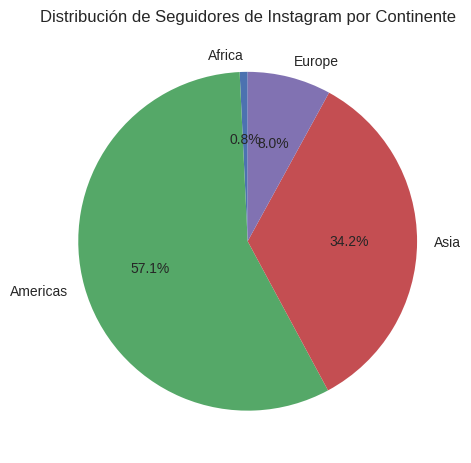

In [57]:
fig, ax = plt.subplots()

ax.pie(dfPropContinentes["prop"], labels = dfPropContinentes["region"], autopct = "%1.1f%%", startangle = 90)
ax.set_title("Distribución de Seguidores de Instagram por Continente")

plt.show()

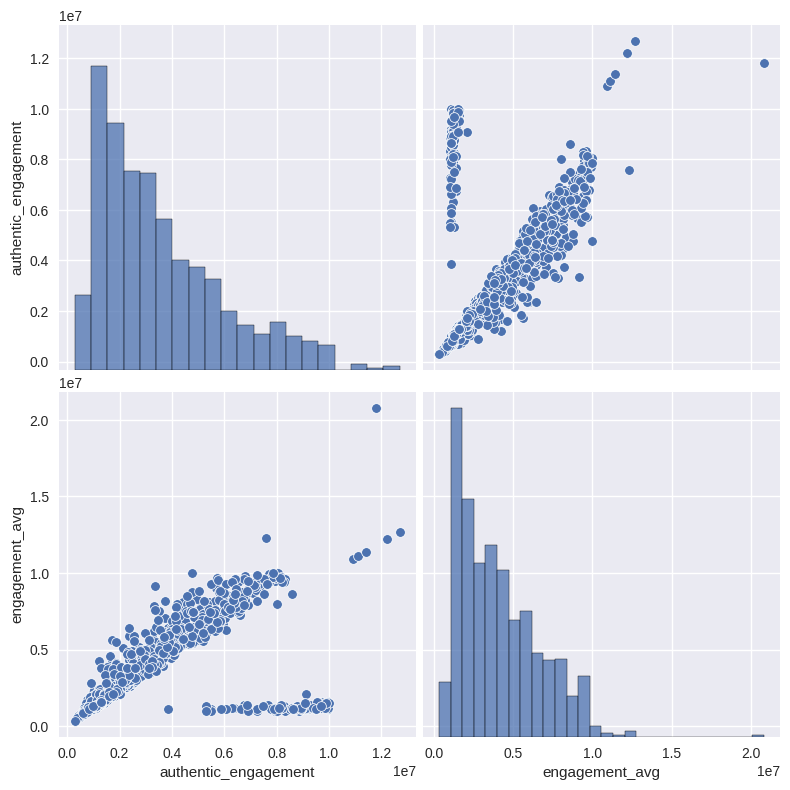

In [65]:
sns.pairplot(dataset_ig[["authentic_engagement", "engagement_avg"]], height= 4)
plt.show()

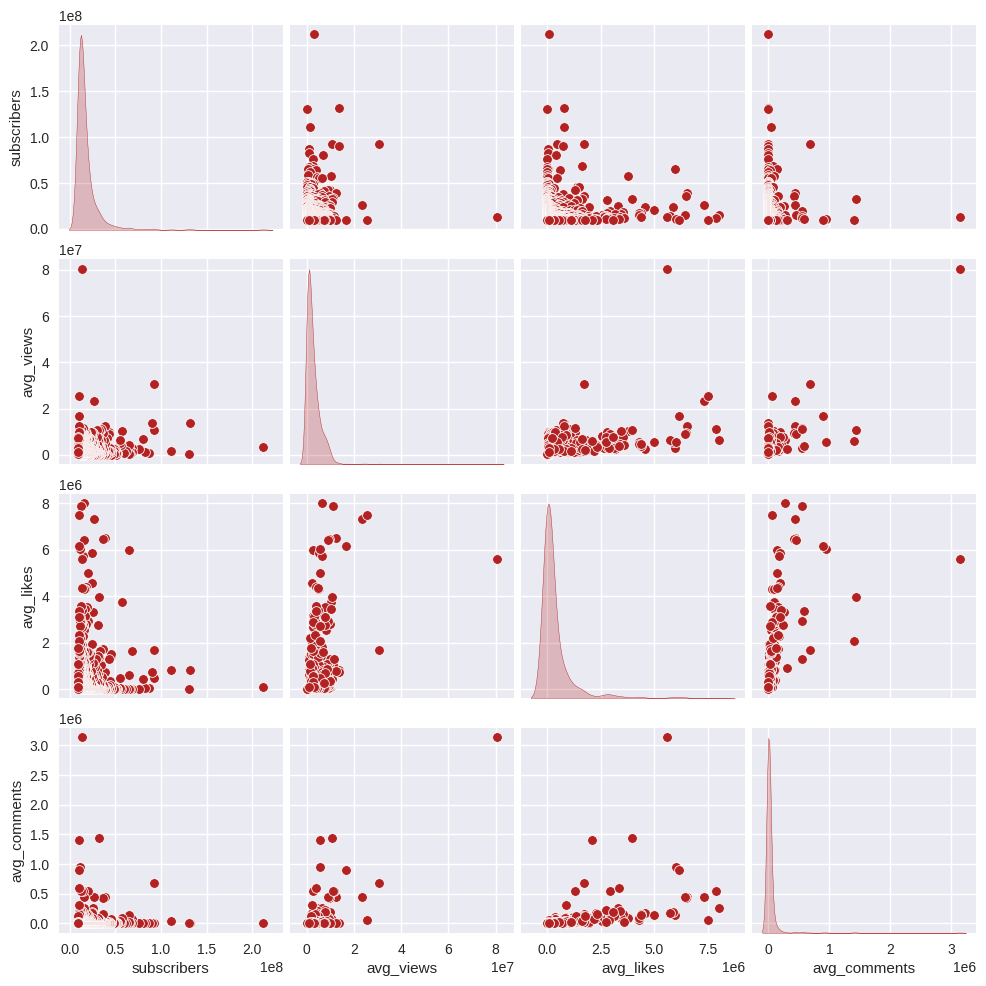

In [59]:
sns.pairplot(dataset_yt[["subscribers", "avg_views", "avg_likes", "avg_comments"]],
             height= 2.5,
             diag_kind='kde',
             plot_kws = {"color" : "firebrick"},
             diag_kws = {"color" : "firebrick"})
plt.show()